In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib

warnings.filterwarnings('ignore')

# Load dataset
data_test = pd.read_csv('/content/drive/MyDrive/Train AI/test_data.csv')
data_train = pd.read_csv('/content/drive/MyDrive/Train AI/train_data.csv')

data_test1 = data_test.dropna()
data_train1 = data_train.dropna()

#print("Số lượng trước khi lọc các cột:", data_non_null.shape[0])
#print('\n')

features = ['cape', 'cin', 'ewss', 'ie', 'isor', 'kx', 'pev', 'slhf', 'slor', 'sshf', 'tclw', 'tcw', 'tcwv', 'aws-5', 'aws-4', 'aws-3', 'aws-2', 'aws-1']
target='aws'

# Xử lý dữ liệu
X_te = data_test1[features]
y_te = data_test1[target]
X_tr = data_train1[features]
y_tr = data_train1[target]

# Apply scaling
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_te)
X_train_scaled = scaler.fit_transform(X_tr)


# Khởi tạo mô hình CatBoost
catboost_model = CatBoostRegressor(loss_function='RMSE', l2_leaf_reg=3, iterations=1000, learning_rate=0.1, depth=6, early_stopping_rounds=30, verbose=100)

mae_scores = []
mse_scores = []
r2_scores = []

checkpoint_dir = '/content/drive/MyDrive/Train AI/save/test_catboost'

# Ensure the checkpoint directory exists
os.makedirs(checkpoint_dir, exist_ok=True)

# Huấn luyện mô hình
catboost_model.fit(X_train_scaled, y_tr.values.reshape(-1, 1))

# Dự đoán
y_pred = catboost_model.predict(X_test_scaled)

# Tính MAE, MSE và R²
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
r2 = r2_score(y_te, y_pred)

mae_scores.append(mae)
mse_scores.append(mse)
r2_scores.append(r2)

# Tính toán trung bình của các chỉ số
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)

# Xuất kết quả ra file txt
results_path = os.path.join(checkpoint_dir, 'summary_results.txt')
with open(results_path, 'w') as file:
    file.write(f"Mean Absolute Error (MAE): {mean_mae}\n")
    file.write(f"Mean Squared Error (MSE): {mean_mse}\n")
    file.write(f"Mean R² Score: {mean_r2}\n")
print('Mean Absolute Error (MAE):', mean_mae)
print('Mean Squared Error (MSE):', mean_mse)
print('Mean R² Score:', mean_r2)

0:	learn: 2.3531609	total: 125ms	remaining: 2m 4s
100:	learn: 1.6502892	total: 4.95s	remaining: 44.1s
200:	learn: 1.5754294	total: 7.86s	remaining: 31.2s
300:	learn: 1.5217329	total: 10.8s	remaining: 25.2s
400:	learn: 1.4773298	total: 13.9s	remaining: 20.8s
500:	learn: 1.4378248	total: 19.4s	remaining: 19.3s
600:	learn: 1.4064491	total: 22.3s	remaining: 14.8s
700:	learn: 1.3770794	total: 25.3s	remaining: 10.8s
800:	learn: 1.3490672	total: 28.3s	remaining: 7.04s
900:	learn: 1.3271603	total: 33.8s	remaining: 3.72s
999:	learn: 1.3052449	total: 36.8s	remaining: 0us
Mean Absolute Error (MAE): 0.36586266387309296
Mean Squared Error (MSE): 2.9776715047957016
Mean R² Score: 0.5014789838887871


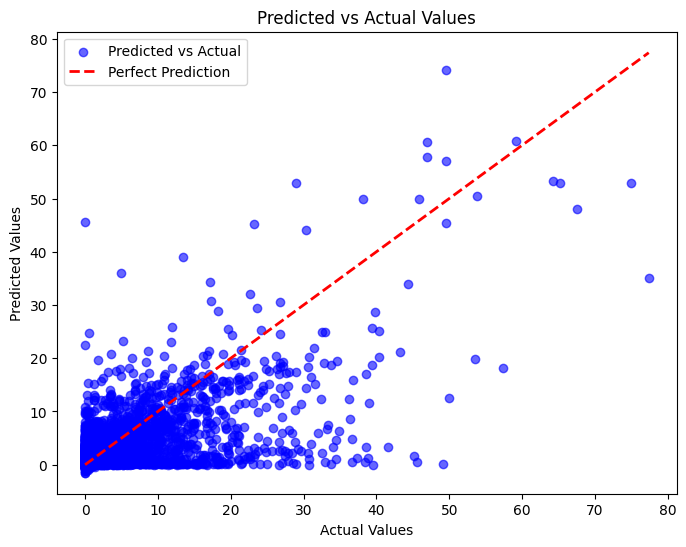

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create 45-degree line for perfect prediction
perfect_line = np.linspace(min(y_te), max(y_te), 100)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot predicted vs actual values
plt.scatter(y_te, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Plot 45-degree line (perfect fit line)
plt.plot(perfect_line, perfect_line, color='red', lw=2, linestyle='--', label='Perfect Prediction')

# Customize plot
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show plot
plt.show()